### Preparation

Set tensorflow 2.x and import libratries

In [1]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
# AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
# from PIL import Image
import numpy as np
import os

**Mount drive**

In [3]:
# from google.colab import drive, files
# from IPython.display import Image
# drive.mount('/content/gdrive')

**Unzip dataset**

In [4]:
# PATH_OF_DATA= '/content/gdrive/"My Drive"/Studia/GSN'
# PATH=PATH_OF_DATA+'/dataset.zip'
# print(PATH)
# !ls {PATH_OF_DATA}
# !ls {PATH}
#!apt install unzip
#!unzip {PATH} -d {PATH_TO_DATA}

In [5]:
PATH_OF_DATA= './sampled_dataset'
print(PATH_OF_DATA)
!ls {PATH_OF_DATA}

./sampled_dataset
elf_archer_1012.jpg	human_knight_2237.jpg	  human_swordsman_3262.jpg
elf_archer_1040.jpg	human_knight_2264.jpg	  human_swordsman_329.jpg
elf_archer_1044.jpg	human_knight_2266.jpg	  human_swordsman_3453.jpg
elf_archer_1083.jpg	human_knight_2333.jpg	  human_swordsman_3455.jpg
elf_archer_1092.jpg	human_knight_2343.jpg	  human_swordsman_3544.jpg
elf_archer_110.jpg	human_knight_2441.jpg	  human_swordsman_370.jpg
elf_archer_1187.jpg	human_knight_2457.jpg	  human_swordsman_434.jpg
elf_archer_1215.jpg	human_knight_2459.jpg	  human_swordsman_441.jpg
elf_archer_122.jpg	human_knight_2553.jpg	  human_swordsman_447.jpg
elf_archer_1241.jpg	human_knight_2588.jpg	  human_swordsman_460.jpg
elf_archer_1271.jpg	human_knight_2624.jpg	  human_swordsman_58.jpg
elf_archer_1321.jpg	human_knight_2663.jpg	  human_swordsman_590.jpg
elf_archer_1429.jpg	human_knight_2665.jpg	  human_swordsman_674.jpg
elf_archer_155.jpg	human_knight_2735.jpg	  human_swordsman_733.jpg
elf_archer_1579.jpg	human_knig

**Control dataset size**

In [6]:
# PATH_OF_DATA= '/content/gdrive/"My Drive"/Studia/GSN/dataset'
!ls {PATH_OF_DATA} | wc -l

870


**Read dataset**

In [7]:
# !pip install -U -q  PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
import cv2
import re

In [8]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [9]:
def read_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)


def get_labels(name):
    return [c for c in name.split('_') if not re.match('[0-9.]', c)]


def read_images_with_labels(path):
    return [(read_image(path + '/' + name), get_labels(name)) for name in os.listdir(path)]

In [10]:
import pathlib
print(PATH_OF_DATA)
!ls {PATH_OF_DATA} | head
# images_with_labels = read_images_with_labels('/content/gdrive/My Drive/Studia/GSN/dataset')
images_with_labels = read_images_with_labels(PATH_OF_DATA)

./sampled_dataset
elf_archer_1012.jpg
elf_archer_1040.jpg
elf_archer_1044.jpg
elf_archer_1083.jpg
elf_archer_1092.jpg
elf_archer_110.jpg
elf_archer_1187.jpg
elf_archer_1215.jpg
elf_archer_122.jpg
elf_archer_1241.jpg


In [11]:
images = [image for (image, label) in images_with_labels] 
labels = [label for (image, label) in images_with_labels]

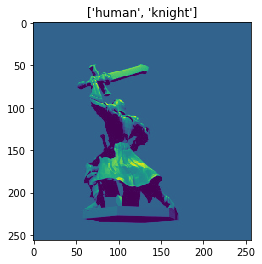

['human', 'knight']
870
870
(256, 256)
[64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64]


In [31]:
# from google.colab.patches import cv2_imshow
# cv2_imshow(images[0])

plt.imshow(images[0])
plt.title(labels[0])
plt.show()

print(labels[0])
print(len(images))
print(len(labels))
print(images[0].shape)

In [13]:
labels_species_unique = set([sp for (sp, cl) in labels])
labels_class_unique = set([cl for (sp, cl) in labels])

print(labels_species_unique)
print(labels_class_unique)
print()

labels_numbers_species = { key: value for (value, key) in enumerate(sorted(labels_species_unique))}
labels_numbers_class = { key: value for (value, key) in enumerate(sorted(labels_class_unique))}

print(labels_numbers_species)
print(labels_numbers_class) 
print()

labels_int = [[labels_numbers_species[sp], labels_numbers_class[cl]] for (sp, cl) in labels]
print(labels[0])
print(labels_int[0])

{'elf', 'orc', 'goblin', 'skeleton', 'panda', 'human'}
{'knight', 'face', 'archer', 'swordsman', 'warrior', 'normal', 'angel', 'spearman', 'mage'}

{'elf': 0, 'goblin': 1, 'human': 2, 'orc': 3, 'panda': 4, 'skeleton': 5}
{'angel': 0, 'archer': 1, 'face': 2, 'knight': 3, 'mage': 4, 'normal': 5, 'spearman': 6, 'swordsman': 7, 'warrior': 8}

['human', 'knight']
[2, 3]


Get one class to test

In [14]:
labels_test = [sp for (sp, cl) in labels_int]
print(labels[:6])
print(labels_int[:6])
print(labels_test[:6])


[['human', 'knight'], ['human', 'angel'], ['human', 'warrior'], ['elf', 'knight'], ['human', 'spearman'], ['human', 'warrior']]
[[2, 3], [2, 0], [2, 8], [0, 3], [2, 6], [2, 8]]
[2, 2, 2, 0, 2, 2]


GPU

In [15]:
def allow_memory_growth():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e)

# run the line below if you're using local runtime and have GTX > 1660 (this is known bug with tensorflow memory allocation)
# allow_memory_growth()

tf.test.gpu_device_name()

''

### Loss Functions

Define loss functions from presentation (both, minimax and wasserstein). Reminder:

For Minimax optimization:

$$
min_G max_D V(G,D) = E_x[log(D(x))] + E_z[log(1 - D(G(z)))]
$$


For Wasserstein optimization:
$$
max D(x) - D(G(z))
$$

$$
max D(G(z))
$$

In [16]:
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)


def min_max_discriminator_loss(real_out, gen_out):
    real_loss = bce(tf.ones_like(real_out), real_out)
    gen_loss = bce(tf.zeros_like(gen_out), gen_out)
    return real_loss + gen_loss


def min_max_generator_loss(gen_out):
    return - min_max_discriminator_loss(tf.ones_like(gen_out), gen_out)


def w_discriminator_loss(real_out, gen_out):
    return - (tf.reduce_mean(real_out) - tf.reduce_mean(gen_out))


def w_generator_loss(gen_out):
    return - tf.reduce_mean(gen_out)

### Generator Model

Generator is a model used only to decode image from given noise. At this point we don't care about what exactly is noise, but what shape has it got.

In [17]:
class Generator(tf.keras.Model):

  def __init__(self):
    super().__init__()

    self.noise_decoder = tf.keras.Sequential([
        # flat      
        tf.keras.layers.Dense(8*8*256),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Reshape([8, 8, 256]),
        # conv without stride (8x8)
        tf.keras.layers.Conv2D(128, 5, 1, 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        # t_conv with stride (16x16)
        tf.keras.layers.Conv2DTranspose(64, 5, 2, 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        # conv without stride (16x16)
        tf.keras.layers.Conv2D(32, 5, 1, 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        # t_conv with stride (32x32)
        tf.keras.layers.Conv2DTranspose(32, 5, 2, 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        # t_conv with stride (32x32)
        tf.keras.layers.Conv2DTranspose(16, 5, 1, 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        # t_conv with stride (64x64)
        tf.keras.layers.Conv2DTranspose(16, 5, 2, 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        # t_conv with stride (64x64)
        tf.keras.layers.Conv2DTranspose(8, 5, 1, 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        # t_conv with stride (128x128)
        tf.keras.layers.Conv2DTranspose(8, 5, 2, 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        # t_conv with stride (128x128)
        tf.keras.layers.Conv2DTranspose(4, 5, 1, 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        # t_conv with stride (256x256)
        tf.keras.layers.Conv2DTranspose(4, 5, 2, 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),

        # conv without stride
        tf.keras.layers.Conv2D(1, 5, 1, 'same')
    ])

  def call(self, noise, training):
    return self.noise_decoder(noise)

### Discriminator Model

Discriminator is used in both situations, when real and fake images are given. Task of a model is to predict (or produce *score* in Wasserstein case) whether input comes from real or fake distribution.

In [18]:
class Discriminator(tf.keras.Model):

  def __init__(self):
    super().__init__()

#     # since discriminator is for classification it should be robust, thus, add
#     # additional regularization like dropout to prevent from pixel attacks
#     self.image_encoder = tf.keras.Sequential([
#         # conv with stride (out = 14x14)
#         tf.keras.layers.Conv2D(64, 5, 2, 'same'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.ReLU(),
#         tf.keras.layers.Dropout(0.3),
#         # conv with steide (out = 7x7)
#         tf.keras.layers.Conv2D(128, 3, 2, 'same'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.ReLU(),
#         tf.keras.layers.Dropout(0.3),
#         # flatten + hidden layer
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(128),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.ReLU(),
#         tf.keras.layers.Dropout(0.3),
#         # prediction (LOGITS!)
#         tf.keras.layers.Dense(1)
#     ])

        # since discriminator is for classification it should be robust, thus, add
    # additional regularization like dropout to prevent from pixel attacks
    self.image_encoder = tf.keras.Sequential([
        # conv with stride (out = 128x128)
        tf.keras.layers.Conv2D(32, 5, 2, 'same'),#, input_shape=(3, 256, 256)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.3),
        # conv with steide (out = 64x64)
        tf.keras.layers.Conv2D(64, 3, 2, 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.3),
        # conv with steide (out = 32x32)
        tf.keras.layers.Conv2D(128, 3, 2, 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.3),
        # conv with steide (out = 16x16)
        tf.keras.layers.Conv2D(256, 3, 2, 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.3),
        # conv with steide (out = 8x8)
        tf.keras.layers.Conv2D(256, 3, 2, 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.3),
        # flatten + hidden layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.3),
        # prediction (LOGITS!)
        tf.keras.layers.Dense(1)
    ])

  def call(self, images, training):
    return self.image_encoder(images)

### Noise Generator

The simplest scenario is when noise is completely random. In this case we don't have any control in images generation. 

**Task:**

Try to modify class below to achieve more control when generating images. Look at the networks input (noise generator -> generator) during images generation. There are passed labels to noise generator but thirs values are not used at all. Try to modify noise generator to obtain situation where label value is take into account when image is generated.

In [19]:
class NoiseGenerator(tf.keras.layers.Layer):

  def __init__(self, num_classes, distribution_size):
    super().__init__()
    self.distribution_size = distribution_size
    # self.data_distributions = self.add_weight(shape=(num_classes, distribution_size), trainable=True)
    # self.data_distributions = tf.tile(tf.range(0, num_classes, dtype=tf.float32)[:, tf.newaxis], [1, distribution_size])
    # TODO:

  def call(self, inputs):
    # dists = tf.nn.embedding_lookup(self.data_distributions, inputs)
    # dists += tf.random.uniform(tf.shape(dists), -0.35, 0.35)
    # return dists
    # TODO
    return tf.random.uniform([tf.shape(inputs)[0], self.distribution_size])

  def diverse_distributions_loss(self):
    # TODO
    return None

### Train Step

Since TensorFlow 2.x it's possible to create optimized graphs. You can place the function with annotation either into class definition (**Task**) or define it outside definition, what makes it possible to use global variables more conveniently. 

Good practice is also to prepare template for such function. In Python function is just another object which might be assigned to variable or passed as argument. In example below annotated function takes only two tensors (what is important from the optimization point of view).

In [20]:
def train_step_template(generator, discriminator, noise, d_optim, g_optim, d_loss_f, g_loss_f):

  @tf.function
  def _train_step_template(images, labels):
    with tf.GradientTape() as d_tape, tf.GradientTape() as g_tape:
      real_out = discriminator(images, True)
      gen_out = discriminator(generator(noise(labels), True), True)

      d_loss = d_loss_f(real_out, gen_out)
      g_loss = g_loss_f(gen_out)
    
    d_grads = d_tape.gradient(d_loss, discriminator.trainable_variables)
    g_grads = g_tape.gradient(g_loss, generator.trainable_variables + noise.trainable_variables)

    d_optim.apply_gradients(zip(d_grads, discriminator.trainable_variables))
    g_optim.apply_gradients(zip(g_grads, generator.trainable_variables + noise.trainable_variables))
  
  return _train_step_template


### Inference

Code below is responsible for image generation from given noise using given generator. Output is clipped by min (-1) and max (1) since real images put into discrimator have values in this range.

In [21]:
def gen_step_template(generator, noise):

  @tf.function
  def _gen_step_template(labels):
    return tf.clip_by_value(generator(noise(labels), False), -1, 1)

  return _gen_step_template

### Utils

Two functions for dataset provider preparation and showing images. Notice, that images have values in range (-1, 1)

In [28]:
def ds(imgs, lbls, buffer_size, batch_size):
  im = [(img.reshape(256, 256, 1).astype('float32') - 127.5) / 127.5  for img in imgs]
#   imgs = imgs.reshape(imgs.shape[0], 256, 256, 3).astype('float32')
#   im = (im - 127.5) / 127.5
#   lbls = [lbl.astype('int32') for lbl in lbls]
  dataset = tf.data.Dataset.from_tensor_slices((im, lbls))\
    .shuffle(buffer_size)\
    .batch(batch_size)
  return dataset

def show_images(images):
  fig = plt.figure(figsize=(12, 12 * 10))

  for i in range(images.shape[0]):
      plt.subplot(10, 10, i+1)
      plt.imshow(images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.show()

### Training

Simple training loop with given number or epochs and batch size. Function takes also 2 parameters: train_step and gen_step which are annotated TensorFlow functions defined above.

We do not run evaluation here since the goal of the presentation is to show generation ability of GAN. To run validation simply take *val_data* (second variable returned by *load_data()* function and similarly as in training run a loop.

After each 10 steps model produces some images which are later displayed.

**Task**

Notice argument passed into *gen_step* function. Values inside are not taken into consideration. Try to modify noise generator to generate images according to the label value.

In [26]:
def train(train_step, gen_step, epochs, batch_size):
#   train_data, _ = tf.keras.datasets.mnist.load_data()
  train_ds = ds(images, labels_test, 870, batch_size)

  for epoch in range(epochs):
    for imgs, lbls in train_ds:
      print(imgs.shape)
      train_step(imgs, lbls)
    
    print('Epoch {0}/{1}'.format(epoch+1, epochs))

    imgs = gen_step(list(labels_species_unique))
    show_images(imgs)

**Train GAN with MiniMax loss function**

(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(102, 256, 256, 1)
Epoch 0/10


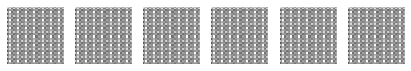

(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(102, 256, 256, 1)
Epoch 1/10


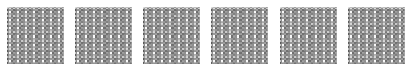

(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(102, 256, 256, 1)
Epoch 2/10


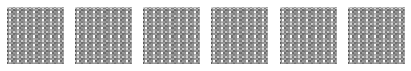

(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(102, 256, 256, 1)
Epoch 3/10


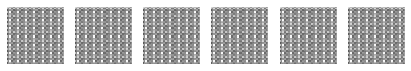

(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(102, 256, 256, 1)
Epoch 4/10


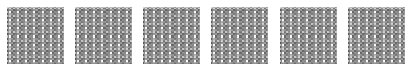

(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(102, 256, 256, 1)
Epoch 5/10


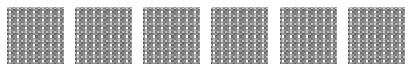

(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(102, 256, 256, 1)
Epoch 6/10


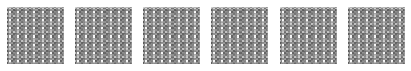

(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(102, 256, 256, 1)
Epoch 7/10


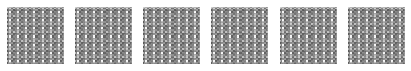

(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(102, 256, 256, 1)
Epoch 8/10


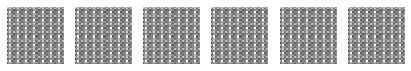

(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(102, 256, 256, 1)
Epoch 9/10


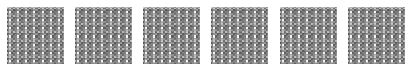

In [29]:
generator = Generator()
discriminator = Discriminator()
noise = NoiseGenerator(len(labels_species_unique), 64)
d_optim = tf.optimizers.Adam(1e-4)
g_optim = tf.optimizers.Adam(1e-4)

train_step = train_step_template(
    generator=generator,
    discriminator=discriminator,
    noise=noise,
    d_optim=d_optim,
    g_optim=g_optim,
    d_loss_f=min_max_discriminator_loss,
    g_loss_f=min_max_generator_loss,
)

gen_step = gen_step_template(
    generator=generator,
    noise=noise
)

train(
    train_step=train_step, 
    gen_step=gen_step, 
    epochs=10,
    batch_size=256
)

**Train GAN with Wasserstein loss function**

In [33]:
generator = Generator()
discriminator = Discriminator()
noise = NoiseGenerator(len(labels_species_unique), 64)
d_optim = tf.optimizers.Adam(1e-4)
g_optim = tf.optimizers.Adam(1e-4)

train_step = train_step_template(
    generator=generator,
    discriminator=discriminator,
    noise=noise,
    d_optim=d_optim,
    g_optim=g_optim,
    d_loss_f=w_discriminator_loss,
    g_loss_f=w_generator_loss,
)

gen_step = gen_step_template(
    generator=generator,
    noise=noise
)

train(
    train_step=train_step, 
    gen_step=gen_step, 
    epochs=10,
    batch_size=128 
)

(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)
(128, 256, 256, 1)


KeyboardInterrupt: 